<a href="https://colab.research.google.com/github/ShivSubedi/Portfolio_projects/blob/main/Portfolio_projects%20/KMeans_Clustering_user_segmentation/Shiv_Subedi_2025_04_30_S2DS_VideoStreaming_2catSubs_HD_Rat5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For ease of running and sharing the code, I will keep all my analysis limited to this single notebook instead of a modular and scalable project type.

**<font color="violet">Project Title: Identifying "Core Fan" from the user base**</font>

<font color="yellow">**Motivation of the project:**</font> As shared in the **"State of Create 2025 report"** from Patreon:
- 86% of core fans are likely to join a dedicated online community.
- 80% of core fans are likely to pay creators.
- 87% of core fans say they’re likely to engage with other fans.

**<font color="yellow">Goal:</font> How to Build a Stronger, More Stable Creator Community** by identifying traits of:
- current Core Fan (<font color="orange">Business Recommendation: </font> Reward, targeted product/content launch)
- potential future Core Fan (<font color="orange">Business Recommendation:</font> Target conversion campaigns for ‘Premium subscription)
- users at risk of churning (<font color="orange">Business Recommendation:</font>form enhanced customer retention strategies)

**<font color="yellow">DataSet:</font>** I will use the 'VideoStreaming' dataset for this project, available publicly in kaggle in the following link: https://www.kaggle.com/datasets/willianoliveiragibin/video-streaming-application/data

# Step 1: Install and import the needed packages

In [ ]:
!pip install opendatasets
!pip install seaborn
!pip install scikit-learn

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Download the dataset from Kaggle

In [ ]:
#downloads the dataset locally in google colab
od.download("https://www.kaggle.com/datasets/willianoliveiragibin/video-streaming-application/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivsubedi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/video-streaming-application


# Step 3: Data pre-processing

## 3(a). Load the data
Here are the columns in the dataset (as described in the Kaggle dataset page):
- User_ID: A unique identifier for the user.
- Session_ID: A unique identifier for the user's session.
- Device_ID: An identifier for the user's device.
- Video_ID: An identifier for the video content being viewed.
- Duration_Watched (minutes): The amount of time (in minutes) the user spent watching the video.
- Genre:The genre of the video content (e.g., Action, Comedy, Drama, etc.).
- Country:The country where the interaction event took place.
- Age: The age of the user.
- Gender: The gender of the user (e.g., Male, Female).
- Subscription_Status: The user's subscription status (e.g., Free, Premium).
- Ratings: The user's rating or feedback for the content (typically on a scale from 1 to 5).
- Languages: The language of the content being viewed.
- Device_Type: The type of device used by the user (e.g., Smartphone, Tablet, etc.).
- Location: The location or city where the interaction event occurred.
- Playback_Quality: The quality of video playback (e.g., HD, SD, 4K).
- Interaction_Events: The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).

In [ ]:
#read the .csv data file
videoStreaming_data=pd.read_csv('video-streaming-application/streaming_viewership_data.csv')
# Show shape of the data
print(f"Shape of the dataset: {videoStreaming_data.shape}")
#display first 5 rows
videoStreaming_data.head(5)

Shape of the dataset: (6214, 16)


,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


## 3(b). Inspect the data for missing values, duplication

In [ ]:
# Check the data types
print(f"data types: {videoStreaming_data.dtypes}")
# Check for missing values
print(f"Missing values per column: {videoStreaming_data.isnull().sum()}")
# Check for total duplicate rows
print(f"Total duplicate rows: {videoStreaming_data.duplicated().sum()}")

data types: User_ID                        object
Session_ID                     object
Device_ID                       int64
Video_ID                        int64
Duration_Watched (minutes)    float64
Genre                          object
Country                        object
Age                             int64
Gender                         object
Subscription_Status            object
Ratings                         int64
Languages                      object
Device_Type                    object
Location                       object
Playback_Quality               object
Interaction_Events              int64
dtype: object
Missing values per column: User_ID                       0
Session_ID                    0
Device_ID                     0
Video_ID                      0
Duration_Watched (minutes)    0
Genre                         0
Country                       0
Age                           0
Gender                        0
Subscription_Status           0
Ratings            

## 3(c) Check if each 'session_ID' is unique to 'user_ID'

In [ ]:
# Group by User_ID and count unique Session_IDs
session_counts = videoStreaming_data.groupby('User_ID')['Session_ID'].nunique()

# Check how many users have more than 1 session
multi_session_users = session_counts[session_counts > 1]

print(f"Total users with multiple sessions: {len(multi_session_users)}")

print(multi_session_users.head())

Total users with multiple sessions: 0
Series([], Name: Session_ID, dtype: int64)


# Step 4 Visualize the data
Visualize 'Duration Watched' vs 'Interaction_Events'


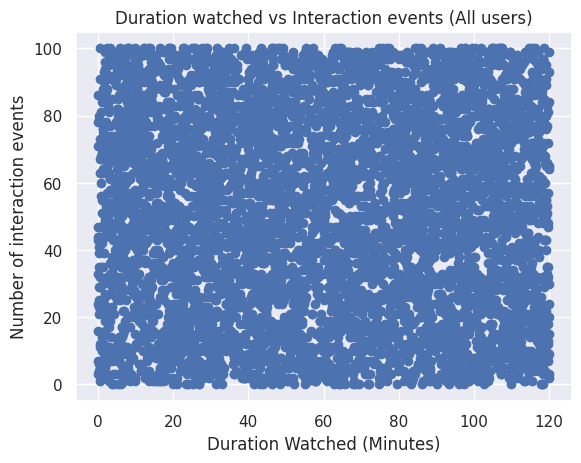

In [ ]:
plt.scatter(videoStreaming_data["Duration_Watched (minutes)"], videoStreaming_data["Interaction_Events"])
plt.title('Duration watched vs Interaction events (All users)')
plt.xlabel('Duration Watched (Minutes)')
plt.ylabel('Number of interaction events')
plt.show()

# Step 5: Feature Engineering
Pre-select the users with features which closely resembles to the target group, i.e. 'core' fans in this case as follows:
- **Duration_Watched (minutes):** The amount of time (in minutes) the user spent watching the video.
  - Assumption: Core Fans watch more content
- **Subscription_Status:** The user's subscription status (e.g., Free, Premium).
  - Intrinsic trait: Core Fans subscribe for “Premium”
- **Ratings:** The user's rating or feedback for the content (typically on a scale from 1 to 5).
  - Assumption: Core Fans mostly provide higher rating (= 5)
- **Playback_Quality:** The quality of video playback (e.g., HD, SD, 4K).
  - Assumption: Core Fans mostly play in 4K Quality
- **Interaction_Events:** The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.)
  - Intrinsic trait: Core Fans interact more


## 5(a) Select users with 'Playback Quality' = 4K

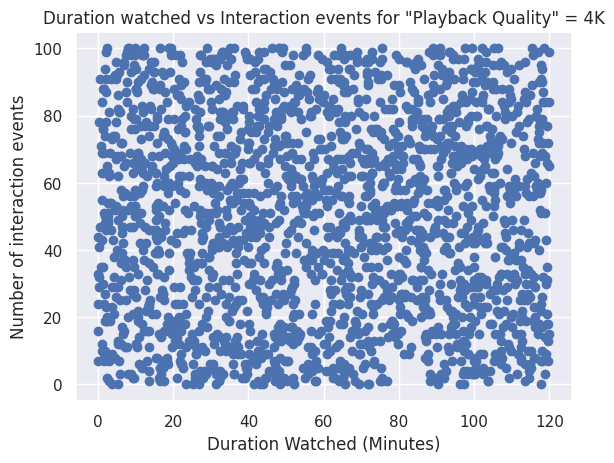

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
7,e707ea19-8d7e-476e-9bf8-c379f01f79da,51522575-8d6c-4489-bb07-ad8391d484e1,73,63,78.338366,Comedy,Guinea,28,Female,Free,1,French,Desktop,West Danieltown,4K,82
17,58cc2409-e8d8-4221-b313-125b277741aa,076c5024-6029-439c-979b-eb3fa8b0adde,687,8,47.919761,Sci-Fi,Estonia,27,Female,Premium,2,Chinese,Smartphone,Dianaville,4K,24


In [ ]:
videoStreaming_data_HD = videoStreaming_data[videoStreaming_data['Playback_Quality']=='4K']
plt.scatter(videoStreaming_data_HD["Duration_Watched (minutes)"], videoStreaming_data_HD["Interaction_Events"])
plt.title(f'Duration watched vs Interaction events for "Playback Quality" = 4K')
plt.xlabel('Duration Watched (Minutes)')
plt.ylabel('Number of interaction events')
plt.show()
videoStreaming_data_HD.head(3)

## 5(b) Select users who have provided Ratings = 5

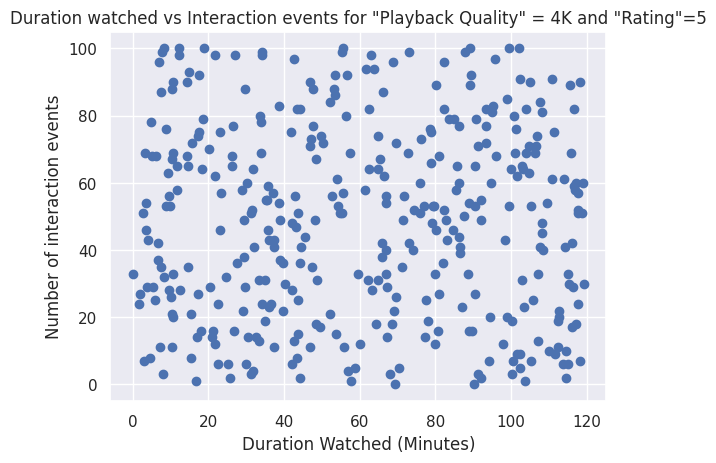

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
19,91da06f5-8529-47d0-8317-fd7a79dae826,d856a070-498d-4b6f-8899-1c866a36701f,301,21,103.003738,Documentary,Lebanon,42,Female,Premium,5,English,Smart TV,New Saraberg,4K,64
31,06135006-df65-42b3-aa74-4551dda9d970,c0b32771-6c3f-40c7-82a7-3c74858a4716,440,93,14.428230,Thriller,Austria,18,Male,Free,5,Chinese,Tablet,Cindymouth,4K,68
53,712df1e5-99e1-4e8a-8332-a6b98d6605e1,b7182a6b-7aaa-4a1c-9a64-750dea499243,265,20,112.679241,Comedy,Cambodia,59,Female,Premium,5,Spanish,Tablet,Grossbury,4K,20


In [ ]:
videoStreaming_data_HD_Rating5 = videoStreaming_data_HD[videoStreaming_data_HD['Ratings']==5]
plt.scatter(videoStreaming_data_HD_Rating5["Duration_Watched (minutes)"], videoStreaming_data_HD_Rating5["Interaction_Events"])
plt.title(f'Duration watched vs Interaction events for "Playback Quality" = 4K and "Rating"=5')
plt.xlabel('Duration Watched (Minutes)')
plt.ylabel('Number of interaction events')
plt.show()
videoStreaming_data_HD_Rating5.head(3)

## 5(c) Split the data into two categories based on 'Subscription_Status'
From here onwards, we will launch the analysis in two stages. Plese select:
- sel_status = 'Free', when you want to analyze customers with 'Free' subscription.

  - Helps identify potential future 'Core' fans
- sel_status = 'Premium', when you want to analyze customers with 'Premium' subscription
  - Helps identify current 'Premium fans'
  - Helps identify fans with a risk of 'Churn' who are already paying for 'Premium' service

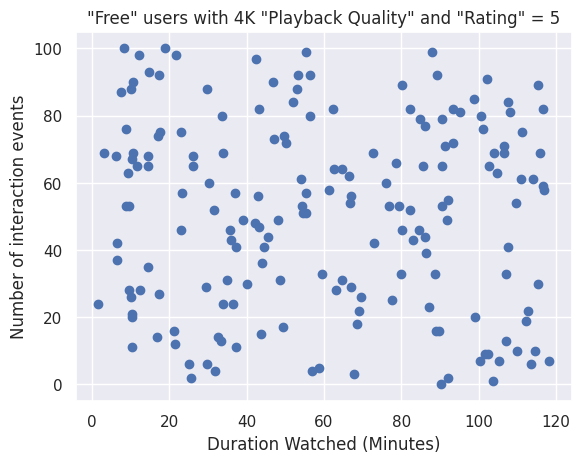

In [ ]:
sel_status = 'Free'  # 'Premium' or 'Free'
sel_users = videoStreaming_data_HD_Rating5[videoStreaming_data_HD_Rating5['Subscription_Status'] == sel_status]

plt.scatter(sel_users["Duration_Watched (minutes)"], sel_users["Interaction_Events"])
plt.title(f'"{sel_status}" users with 4K "Playback Quality" and "Rating" = 5')
plt.xlabel('Duration Watched (Minutes)')
plt.ylabel('Number of interaction events')
plt.show()

## 5(d) Select the features for clustering
We will perform clustering based on the following features:
- Duration_Watched (minutes) [Column #4]
- Interaction_Events [Column #15]

In [ ]:
# Selecting only the relevant features
features_for_clustering = sel_users.iloc[:,[4,15]]
features_for_clustering.head(3)

,Duration_Watched (minutes),Interaction_Events
31,14.428230,68
143,80.119553,89
154,107.504780,84


## 5(e) Apply standard scaling
We notice that the different features/columns have varying range of values. Example: ' Subscription_Status' has values 0 and 1,  'Playback_Quality' has values from 1-3, 'Ratings' has values 1-5, and so on. If we combine different features together in their current state for clustering, bigger magnitude features will dominate the distance calculations. Since clustering algorithms like 'K-Means' use Euclidean distance, this imbalance would distort the clustering results.

Solution: To ensure the fair contribution from each feature, we standardize the features(x) to have mean of 0 standard deviation of 1, using the relation:

**scaled_value(z) = (x - mean(x))/std(x)**, where, mean(x) is the average of the feature and std(x) is the standard deviation of the feature.'

This scaling ensures that all features contribute equally to the clustering process.

In [ ]:
from sklearn import preprocessing
#perform the scaling
scaled_features_for_clustering = preprocessing.scale(features_for_clustering)
# scaled_features_for_clustering

# Step 6: KMeans Clustering

## 6(a) Find optimal number of clusters based on WCSS (Elbow Method)
WCSS stands for 'Within Cluster Sum of Squares' and measures the cluster's compactness. We aim to choose a cluster that can provide a 'Low' value (at an elbow location, hence also called the elbow method) to WCSS. For this, we compute WCSS per cluster range (we want to investigate) and plot WCSS vs cluster range.

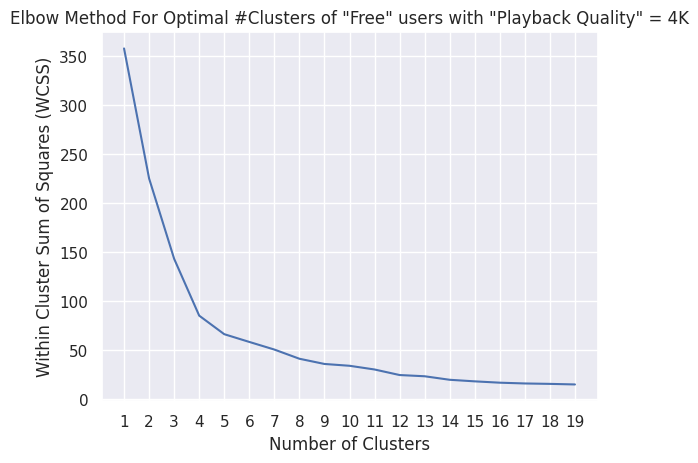

In [ ]:
wcss = []
num_clusters = range(1, 20)
for k in num_clusters:
    kmeans = KMeans(k, random_state=99)
    kmeans.fit(scaled_features_for_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Plot
plt.plot(num_clusters, wcss)
plt.xticks(num_clusters)
plt.title(f'Elbow Method For Optimal #Clusters of "{sel_status}" users with "Playback Quality" = 4K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

## 6(b) Apply KMeans

In [ ]:
# Initialize KMeans
num_clusters=5
kmeans = KMeans(n_clusters=num_clusters, random_state=99)
kmeans.fit(scaled_features_for_clustering)

KMeans(n_clusters=5, random_state=99)

In [ ]:
identified_clusters = kmeans.fit_predict(scaled_features_for_clustering)

# Fit the model and predict clusters
# Use .loc to create the new column and assign the clusters
sel_users_wPred = sel_users.copy()
sel_users_wPred.loc[:, f'cluster_pred_{sel_status}'] = identified_clusters

# Check how many users fall into each cluster
cluster_counts = sel_users_wPred[f'cluster_pred_{sel_status}'].value_counts()
print(cluster_counts)
sel_users_wPred.head(5)

cluster_pred_Free
3    45
4    39
1    36
0    33
2    26
Name: count, dtype: int64


,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events,cluster_pred_Free
31,06135006-df65-42b3-aa74-4551dda9d970,c0b32771-6c3f-40c7-82a7-3c74858a4716,440,93,14.428230,Thriller,Austria,18,Male,Free,5,Chinese,Tablet,Cindymouth,4K,68,3
143,30bb729a-ef95-4c0c-9568-cbeab0d1fa32,1fe7007e-1375-4866-849e-37dd17a2103f,839,25,80.119553,Action,Bosnia and Herzegovina,44,Male,Free,5,German,Smartphone,North Jasonchester,4K,89,0
154,ef2394b8-236b-47cb-85df-5086be8a9dd0,78434959-3276-4230-b1ef-3c0a52135bdf,289,90,107.504780,Documentary,Maldives,63,Female,Free,5,French,Desktop,North Philip,4K,84,0
241,b0e1fab9-f44e-49f3-95c7-fc75b2673b41,e2e10514-b519-47b3-acbb-85617f4c23e7,177,76,10.672992,Thriller,Saint Helena,28,Male,Free,5,Chinese,Desktop,Lake Darleneville,4K,90,3
300,33d2e454-cd3e-47e3-ae5c-af9791ea4d66,3850b0a1-2f4d-4ef9-ba0f-330a5429684f,249,100,34.041847,Comedy,Wallis and Futuna,16,Female,Free,5,Spanish,Tablet,Port Meagan,4K,24,1


## 6(c) Visualize the clustering

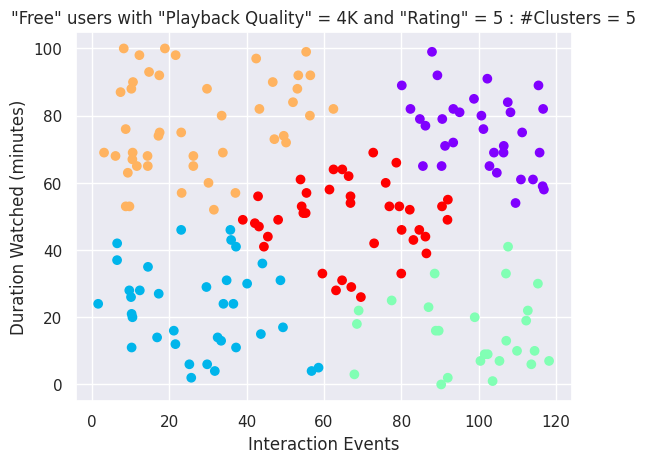

In [ ]:
# plt.scatter(videoStreaming_data_wSub["Duration_Watched (minutes)"], videoStreaming_data_wSub["Interaction_Events"], c=videoStreaming_data_wSub['cluster_wSubType'], cmap='rainbow')
plt.scatter(sel_users_wPred["Duration_Watched (minutes)"], sel_users_wPred["Interaction_Events"], c=sel_users_wPred[f'cluster_pred_{sel_status}'], cmap='rainbow')
plt.title(f'"{sel_status}" users with "Playback Quality" = 4K and "Rating" = 5 : #Clusters = {num_clusters}')
plt.xlabel('Interaction Events')
plt.ylabel('Duration Watched (minutes)')
plt.show()

## 6(d) Get number of data per cluster

In [ ]:
# Get colors from 'rainbow' colormap
print(range(num_clusters))
cmap = plt.get_cmap('rainbow')
colors = []
for i in range(num_clusters):
    colors.append(matplotlib.colors.rgb2hex(cmap(i / num_clusters)))


# Build the result DataFrame
result_df = pd.DataFrame({
    'cluster_number': cluster_counts.index,
    'cluster_color': colors,
    'data_point_per_cluster': cluster_counts.values
})

print(result_df)


range(0, 5)
   cluster_number cluster_color  data_point_per_cluster
0               3       #8000ff                      45
1               4       #1996f3                      39
2               1       #4df3ce                      36
3               0       #b2f396                      33
4               2       #ff964f                      26


# Step 7: Conclusion
- **Goal:** Identify the ‘Core Fans’ from all the users base.

- **Action performed:** Analyzed user behavior and content consumption of video streaming viewership data from Kaggle.  

- **Method:** KMeans clustering

- **Result:**
  - From the ‘Premium’ users,we identified:
    - Current ‘Core Fans’
    - Users at risk of churning

  - From the ‘Free’ users, we identified:
    - Potential future ‘Core Fans’

- **Business Action Recommentation:**
  - Reward and launch targeted product/content for current ‘Core Fans’
  - Form enhanced customer retention strategies for current ‘Premium’ users at risk of churning.
  - Target conversion campaigns for ‘Premium subscription for potential future ‘Core Fans’





# Step 8: Future Work

## Step 8(a): Analyze current ‘core fans’ based on following:
- **Genre** (add more contents on this Genre)
- **Age** (add more content suitable to the particular age-group)
- **Gender** (analyze the type of contents preferred by different genders)
- **Language** (add more content/subtitle for this group of languages)


## Step 8(b): Analyze future ‘core fans’:
- based on above criterias (Genre, Age, Gender, Language) too in order to plan ahead in action to keep this group interested for conversion to ‘Premium’

## Step 8(c) Re-analysis of this project
We can re-analyze this project based on new assumptions of 'Core fans'
- “Playback_Quality” = HD (Reason: HD still considered high depending on internet speed/device)
- “Rating” = 4 (Reason: This rating is still high + reflecting any dissatisfaction)
